<a href="https://colab.research.google.com/github/RMLAI/zero-to-mastery-ml/blob/master/Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Automotive MPG Analysis

*   List item

*   List item

*   List item
*   List item


*   List item


*   List item


*   List item



In [0]:
cd drive/My Drive/Data

/content/drive/My Drive/Data


In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Auto.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [0]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [0]:
df.shape

(397, 9)

In [0]:
#check for any columns with missing data

In [0]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

No missing values in the dataset

In [0]:
#datatype of each feature
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [0]:
#descriptive stats of the dataset
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [0]:
#Getting Auto companies data from name column
df1=df
df1[['make','model']]=df['name'].str.split(' ',1,expand=True)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,make,model
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,torino


In [0]:
#dropping the name column
df1=df1.drop(columns=(['horsepower']))


In [0]:
df1.head()

,mpg,cylinders,displacement,weight,acceleration,year,origin,name,make,model
0,18.0,8,307.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,3693,11.5,70,1,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,3436,11.0,70,1,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,3433,12.0,70,1,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,3449,10.5,70,1,ford torino,ford,torino


In [0]:
# Using EDA to understand study the dataset
df1.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year',
       'origin', 'make', 'model'],
      dtype='object')

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


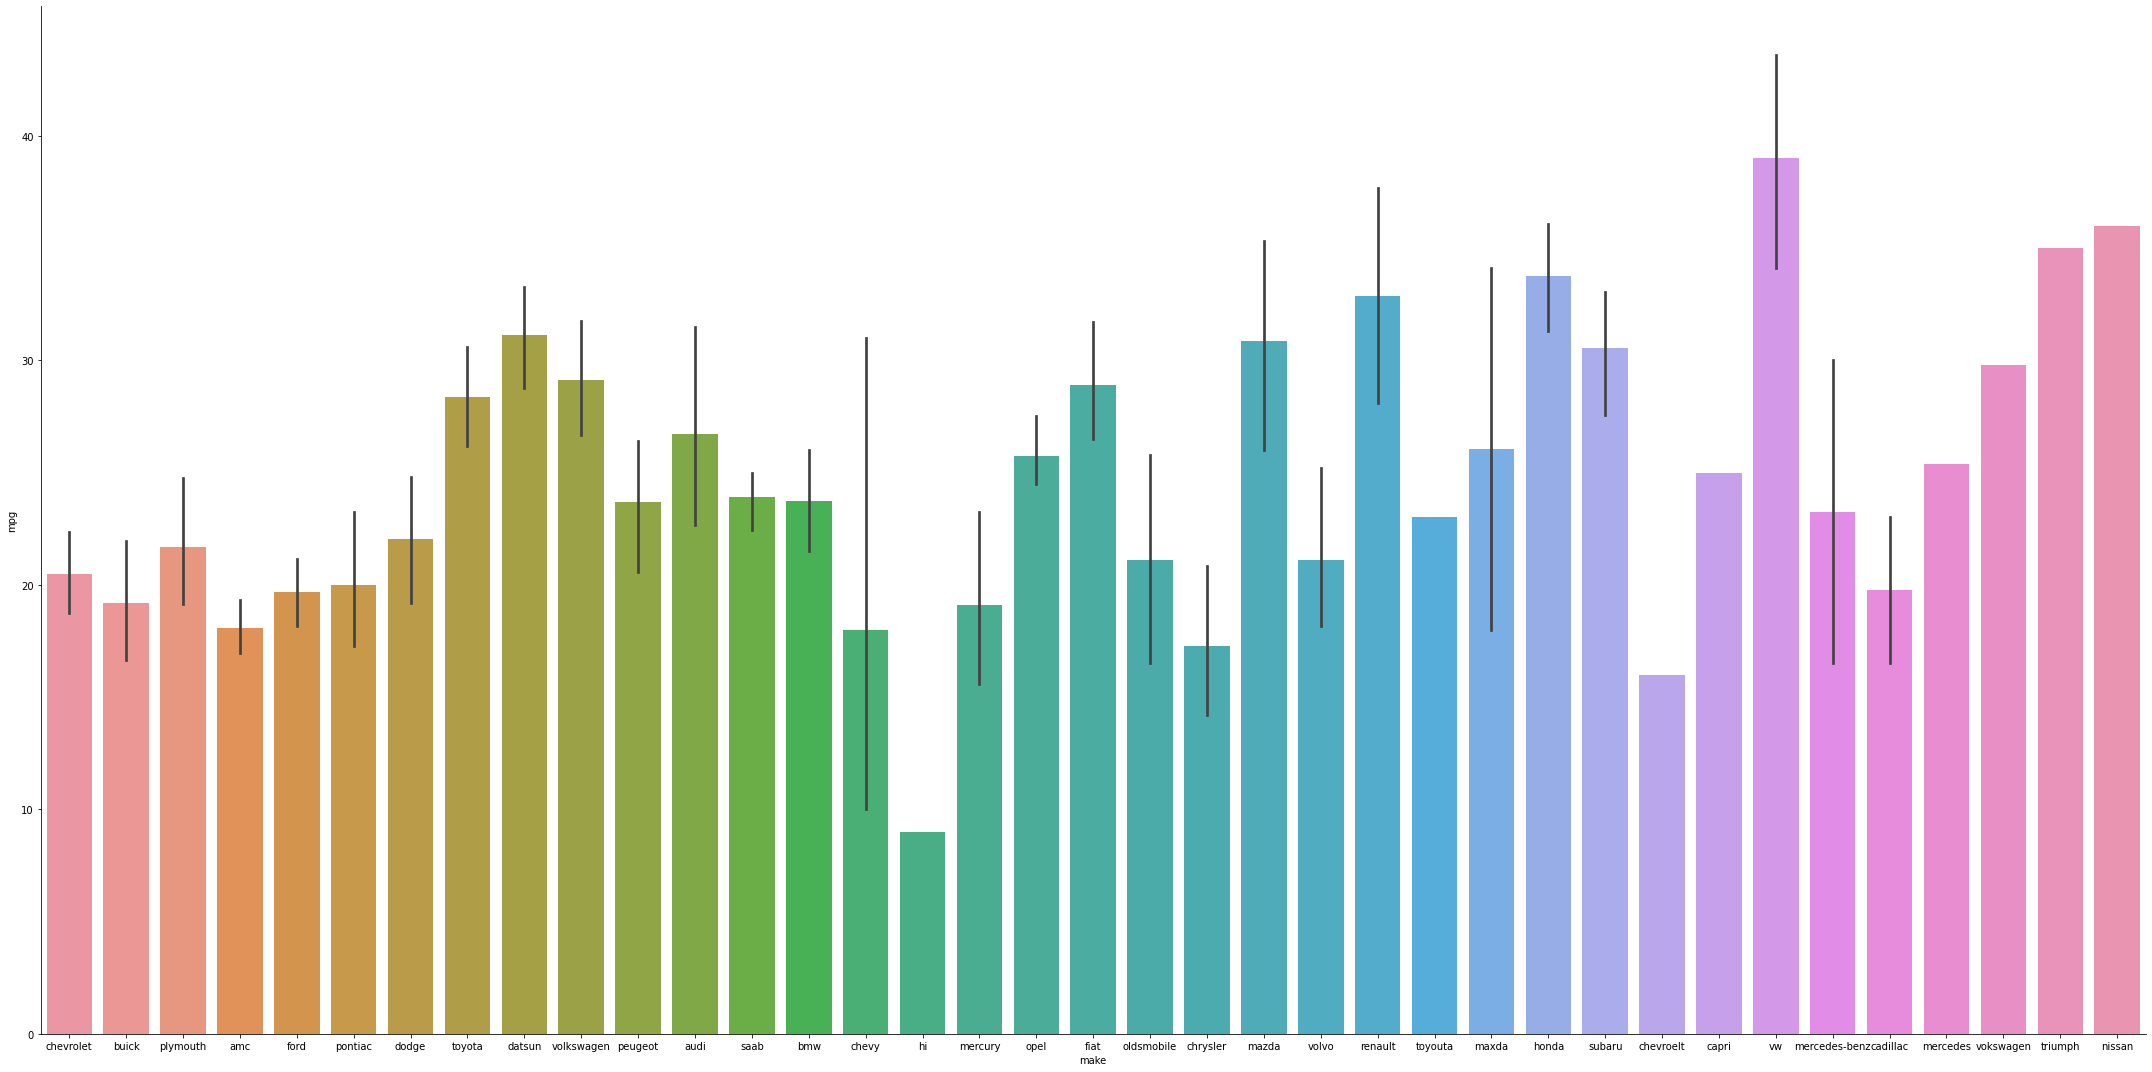

In [0]:
#df1=sns.load_dataset('df1')
sns.catplot(x='make',y='mpg',kind='bar',data=df1,legend=True,height=15,aspect=2)

# Observation 1 - Volkswagen and Nissan seem to have high MPG while Hi has the lowest MPG

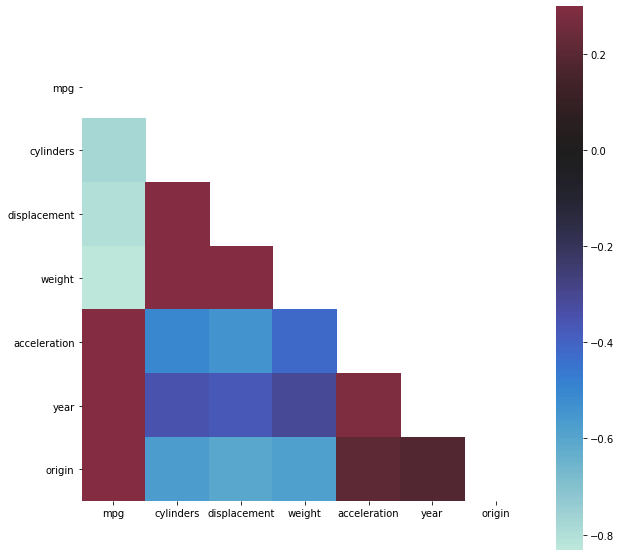

In [0]:
#plotting a correlogram
#compute the correlation matrix
corr=df1.corr()

#generate a mask for upper traingle
mask=np.triu(np.ones_like(corr,dtype=np.bool))

#set up the matplotlib figure
fig,ax=plt.subplots(figsize=(10,10))

#Draw a correlogram
sns.heatmap(corr,mask=mask,vmax=0.3,center=0,square=True)

#Observation 2 - Weight, Cylinders and displacement seem to be negatively correlated to MPG

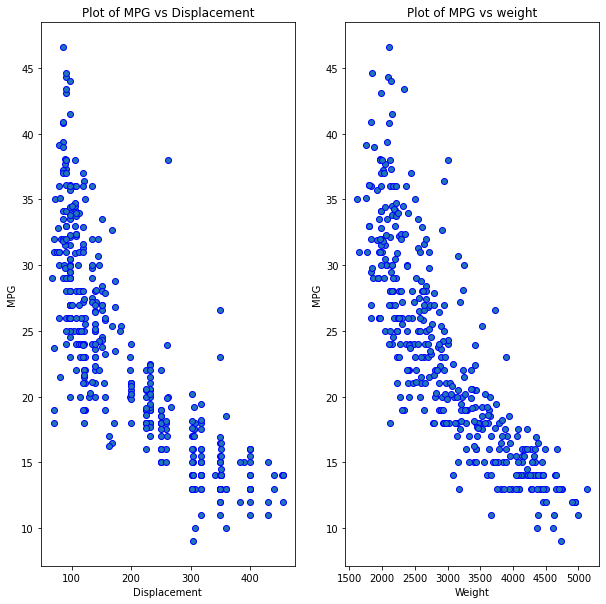

In [0]:
#Visualizing the relationship between different paramters and MPG
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,10))

ax1.scatter(df1['displacement'],df1['mpg'],edgecolors='blue')
ax1.set(title="Plot of MPG vs Displacement",xlabel='Displacement',ylabel='MPG')

ax2.scatter(df1['weight'],df1['mpg'],edgecolors='blue')
ax2.set(title="Plot of MPG vs weight",xlabel='Weight',ylabel='MPG');




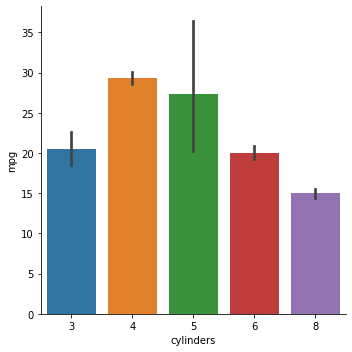

In [0]:
sns.catplot(x='cylinders',y='mpg',kind='bar',data=df1,legend=True,height=5,aspect=1);

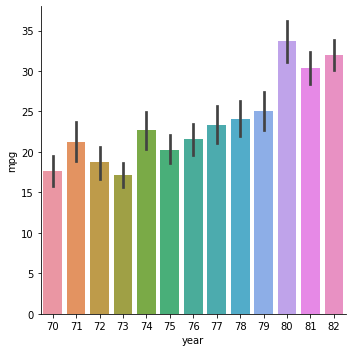

In [0]:
sns.catplot(x='year',y='mpg',kind='bar',data=df1,legend=True,height=5,aspect=1);

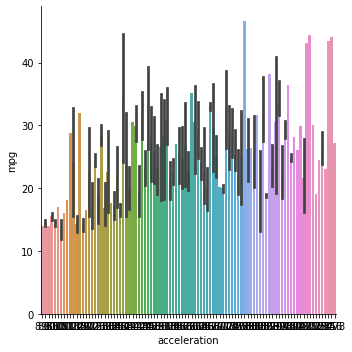

In [0]:
sns.catplot(x='acceleration',y='mpg',kind='bar',data=df1,legend=True,height=5,aspect=1);

Observation 3 - MPG is inversely correlated to weight of the car, no. of cylinder,displacement. slightly +vely correlated to acceleration and model year

In [0]:
#Simple Multiple Linear Regression Example
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
#Making the features and target columns
X=df1.drop(columns=['mpg','make','model','origin','name'])
y=df1['mpg']

In [0]:
#checking the shape of the explanatory and target variables
X.shape,y.shape

((397, 5), (397,))

In [0]:
#splitting data into trainning and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
#checking the sizes of the new datasets
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((80, 5), (317, 5), (80,), (317,))

In [0]:
# Making the linear regression model
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# making predictions
y_predict=regr.predict(X_test)
# seeing the predicted and actual values
df_temp=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df_temp.head(10)


,Actual,Predicted
65,14.0,12.601863
132,25.0,25.016134
74,13.0,11.469383
78,21.0,20.517175
37,18.0,17.517294
54,35.0,28.838899
293,31.9,32.503637
60,20.0,24.770811
12,15.0,13.514209
361,25.4,27.254860


In [0]:
#Print coefficients
print('Coefficients \n',regr.coef_)

Coefficients 
 [-0.16633018  0.00859258 -0.00714848  0.15601878  0.79663335]
ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
#coefficients
coeff_df = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
cylinders,-0.166330
displacement,0.008593
weight,-0.007148
acceleration,0.156019
year,0.796633


Year has the highest correlation with mileage(MPG), Followed by acceleration. Cylinders, weight has slight negative correlation
Multicollinearity has to be checked

In [0]:
from sklearn.metrics import mean_squared_error,r2_score

In [0]:
#MSE and R-Square values
print('Mean Square error: %.2f' % mean_squared_error(y_predict,y_test))

Mean Square error: 8.70
ERROR! Session/line number was not unique in database. History logging moved to new session 65


In [0]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))

Coefficient of determination: 0.83


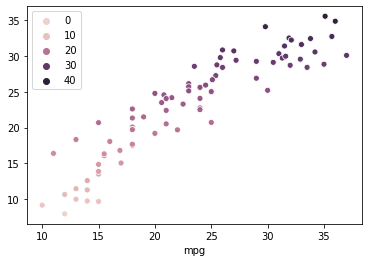

In [0]:
# Plot outputs
sns.scatterplot(y_test,y_predict,hue=y_predict,);


In [0]:
df1['mpg'].mean()

23.515869017632248